#Loading Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf 

# Loading Dataset
**CIFAR-10** : https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

In [ ]:
cifar10 = tf.keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3) (50000, 1) (10000, 1)


In [ ]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [ ]:
y_train  # list of lists

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
# y_train.flatten()

#View Dataset

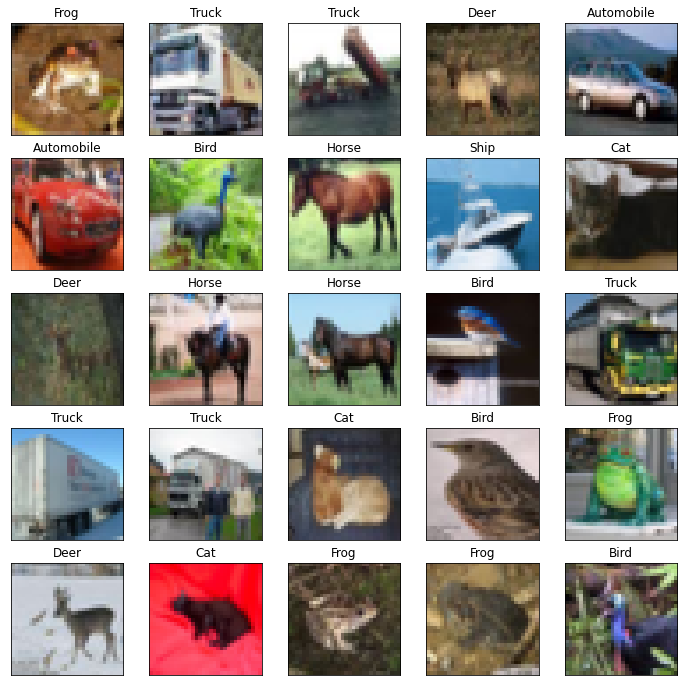

In [ ]:
fig, axes = plt.subplots(ncols = 5, nrows = 5, figsize = (12, 12))

index = 0 
for i in range(5):
  for j in range(5):
    axes[i,j].set_title(labels[y_train[index][0]])
    axes[i,j].imshow(X_train[index])
    axes[i,j].get_xaxis().set_visible(False)
    axes[i,j].get_yaxis().set_visible(False)
    index += 1



# Convert coloured images to grayscale

In [ ]:
import cv2

In [ ]:
X_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train])
X_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test])

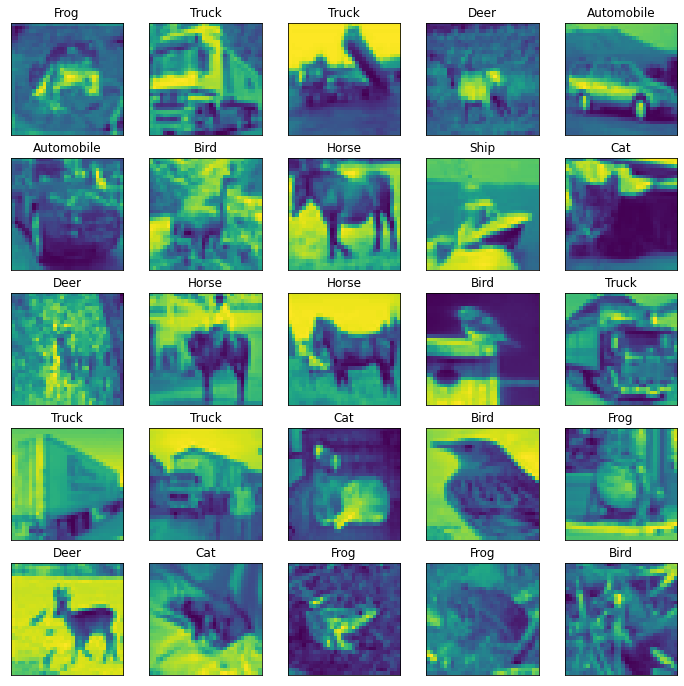

In [ ]:
fig, axes = plt.subplots(ncols = 5, nrows = 5, figsize = (12, 12))

index = 0 
for i in range(5):
  for j in range(5):
    axes[i,j].set_title(labels[y_train[index][0]])
    axes[i,j].imshow(X_train[index])
    axes[i,j].get_xaxis().set_visible(False)
    axes[i,j].get_yaxis().set_visible(False)
    index += 1



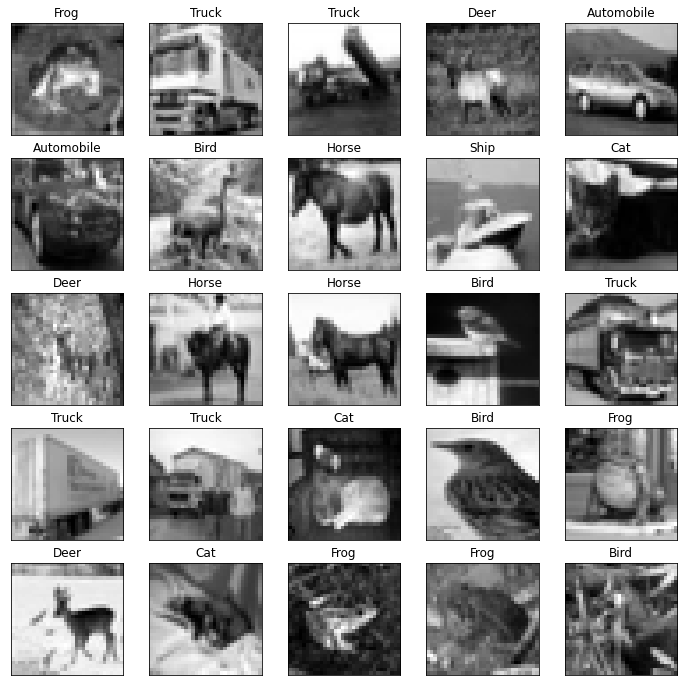

In [ ]:
fig, axes = plt.subplots(ncols = 5, nrows = 5, figsize = (12, 12))

index = 0 
for i in range(5):
  for j in range(5):
    axes[i,j].set_title(labels[y_train[index][0]])
    axes[i,j].imshow(X_train[index], cmap='gray')
    axes[i,j].get_xaxis().set_visible(False)
    axes[i,j].get_yaxis().set_visible(False)
    index += 1


# Normalization

In [ ]:
X_train  = X_train/255.0
X_test  = X_test/255.0

In [ ]:
# from sklearn.preprocessing import OneHotEncoder

# one_hot_enc = OneHotEncoder(sparse = False)
# y_train = one_hot_enc.fit_transform(y_train)
# y_test = one_hot_enc.transform(y_test)

# One Hot Encoding

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

# Reshaping

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
X_train.shape, X_test.shape

((50000, 32, 32, 1), (10000, 32, 32, 1))

In [ ]:
(X_train.shape[1], X_train.shape[2], 1)

(32, 32, 1)

# Model Building

In [ ]:
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout,BatchNormalization

In [ ]:
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout,BatchNormalization

model = Sequential()
input_shape = (X_train.shape[1], X_train.shape[2], 1)

# Convolutional Layer
model.add(Conv2D(filters = 32, 
                 kernel_size = (3,3), 
                 input_shape = (32, 32, 1 ),
                 activation = 'relu',
                 padding='same'))
model.add(BatchNormalization())

# Pooling layer
model.add(MaxPool2D( pool_size = (2,2)))

# Dropout Layer
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


# Flattening 
model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation = 'softmax'))



model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = 'accuracy')



model.fit(X_train, y_train, epochs=12)
model.evaluate(X_test,y_test)

Epoch 1/12
1563/1563 [==============================] - 154s 98ms/step - loss: 1.6482 - accuracy: 0.4144
Epoch 2/12
1563/1563 [==============================] - 151s 97ms/step - loss: 1.2535 - accuracy: 0.5658
Epoch 3/12
1563/1563 [==============================] - 151s 96ms/step - loss: 1.0745 - accuracy: 0.6321
Epoch 4/12
1563/1563 [==============================] - 151s 97ms/step - loss: 0.9738 - accuracy: 0.6680
Epoch 5/12
1563/1563 [==============================] - 151s 97ms/step - loss: 0.9043 - accuracy: 0.6934
Epoch 6/12
1563/1563 [==============================] - 151s 96ms/step - loss: 0.8505 - accuracy: 0.7103
Epoch 7/12
1563/1563 [==============================] - 151s 97ms/step - loss: 0.8040 - accuracy: 0.7275
Epoch 8/12
1563/1563 [==============================] - 151s 97ms/step - loss: 0.7631 - accuracy: 0.7428
Epoch 9/12
1563/1563 [==============================] - 160s 102ms/step - loss: 0.7260 - accuracy: 0.7527
Epoch 10/12
1563/1563 [==============================]

[0.8980823159217834, 0.7092000246047974]

In [ ]:
model = Sequential()
input_shape = (X_train.shape[1], X_train.shape[2], 1)

model.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), 
    padding='same', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = 'accuracy')


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 16)        9232      
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 32)        4640      
                                                      

# Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

# Model training

In [ ]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

In [ ]:
r = model.fit(train_generator, 
              epochs = 50,
              steps_per_epoch = steps_per_epoch,
              validation_data = (X_test, y_test))

Epoch 1/50
1562/1562 [==============================] - 183s 116ms/step - loss: 1.8019 - accuracy: 0.3500 - val_loss: 1.7139 - val_accuracy: 0.4142
Epoch 2/50
1562/1562 [==============================] - 167s 107ms/step - loss: 1.4642 - accuracy: 0.4801 - val_loss: 1.6209 - val_accuracy: 0.4662
Epoch 3/50
1562/1562 [==============================] - 166s 106ms/step - loss: 1.3215 - accuracy: 0.5343 - val_loss: 1.2385 - val_accuracy: 0.5804
Epoch 4/50
1562/1562 [==============================] - 167s 107ms/step - loss: 1.2372 - accuracy: 0.5668 - val_loss: 1.2674 - val_accuracy: 0.5854
Epoch 5/50
1562/1562 [==============================] - 170s 109ms/step - loss: 1.1716 - accuracy: 0.5907 - val_loss: 1.0754 - val_accuracy: 0.6381
Epoch 6/50
1562/1562 [==============================] - 169s 108ms/step - loss: 1.1300 - accuracy: 0.6079 - val_loss: 0.9398 - val_accuracy: 0.6759
Epoch 7/50
1562/1562 [==============================] - 175s 112ms/step - loss: 1.0938 - accuracy: 0.6203 - val_

In [ ]:
r = model.fit(train_generator, 
              epochs = 50,
              steps_per_epoch = steps_per_epoch,
              validation_data = (X_test, y_test),
              callbacks = [es]) #2nd

Epoch 1/50
1562/1562 [==============================] - 405s 259ms/step - loss: 1.9511 - accuracy: 0.2668 - val_loss: 1.6122 - val_accuracy: 0.4074
Epoch 2/50
1562/1562 [==============================] - 397s 254ms/step - loss: 1.5472 - accuracy: 0.4376 - val_loss: 1.3320 - val_accuracy: 0.5173
Epoch 3/50
1562/1562 [==============================] - 399s 255ms/step - loss: 1.3530 - accuracy: 0.5183 - val_loss: 1.1957 - val_accuracy: 0.5780
Epoch 4/50
1562/1562 [==============================] - 396s 253ms/step - loss: 1.2341 - accuracy: 0.5664 - val_loss: 1.1132 - val_accuracy: 0.6085
Epoch 5/50
1562/1562 [==============================] - 391s 251ms/step - loss: 1.1608 - accuracy: 0.5934 - val_loss: 0.9898 - val_accuracy: 0.6513
Epoch 6/50
1562/1562 [==============================] - 397s 254ms/step - loss: 1.1041 - accuracy: 0.6153 - val_loss: 0.9746 - val_accuracy: 0.6559
Epoch 7/50
1562/1562 [==============================] - 397s 254ms/step - loss: 1.0684 - accuracy: 0.6266 - val_

#Model Evaluation

In [ ]:
prediction = model.evaluate(X_test, y_test)
print(f'Test Accuracy : {prediction[1] * 100:.2f}%')


313/313 [==============================] - 7s 24ms/step - loss: 0.6668 - accuracy: 0.7785
Test Accuracy : 77.85%


In [ ]:
prediction = model.evaluate(X_test, y_test)
print(f'Test Accuracy : {prediction[1] * 100:.2f}%')

313/313 [==============================] - 17s 55ms/step - loss: 0.8055 - accuracy: 0.7281
Test Accuracy : 72.81%


In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)

ValueError: ignored

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)


fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax, cmap='blues')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

# Saving model

In [ ]:
from tensorflow.keras.models import load_model

model.save('Cifar-10 CNN.h5')

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from keras.datasets import cifar10
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from tensorflow.keras import datasets, layers, models
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping


# Loading data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
X_train = X_train / 255.0
X_test = X_test / 255.0

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=15)
cnn.evaluate(X_test,y_test)

Epoch 1/15
1563/1563 [==============================] - 62s 40ms/step - loss: 1.4425 - accuracy: 0.4781
Epoch 2/15
1563/1563 [==============================] - 62s 40ms/step - loss: 1.1065 - accuracy: 0.6123
Epoch 3/15
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9827 - accuracy: 0.6589
Epoch 4/15
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8926 - accuracy: 0.6915
Epoch 5/15
1563/1563 [==============================] - 60s 39ms/step - loss: 0.8253 - accuracy: 0.7146
Epoch 6/15
1563/1563 [==============================] - 60s 39ms/step - loss: 0.7668 - accuracy: 0.7327
Epoch 7/15
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7194 - accuracy: 0.7505
Epoch 8/15
1563/1563 [==============================] - 77s 49ms/step - loss: 0.6702 - accuracy: 0.7659
Epoch 9/15
1563/1563 [==============================] - 60s 39ms/step - loss: 0.6303 - accuracy: 0.7790
Epoch 10/15
1563/1563 [==============================] - 61s 39m

[1.067828893661499, 0.6899999976158142]

In [ ]:
prediction = cnn.evaluate(X_test, y_test)
print(f'Test Accuracy : {prediction[1] * 100:.2f}%')

313/313 [==============================] - 4s 12ms/step - loss: 1.0678 - accuracy: 0.6900
Test Accuracy : 69.00%


# current

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from keras.datasets import cifar10
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from tensorflow.keras import datasets, layers, models
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping
import cv2

# Loading data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# y_train = y_train.reshape(-1,)
# y_test = y_test.reshape(-1,)

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
print(y_train[0])

X_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train])
X_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test])


X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)


cnn_mod = models.Sequential([
    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1), padding = 'same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),                         

    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn_mod.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
cnn_mod.fit(X_train, y_train, epochs=15)
cnn_mod.evaluate(X_test,y_test)

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Epoch 1/15
1563/1563 [==============================] - 82s 52ms/step - loss: 1.5214 - accuracy: 0.4482
Epoch 2/15
1563/1563 [==============================] - 80s 51ms/step - loss: 1.1378 - accuracy: 0.6017
Epoch 3/15
1563/1563 [==============================] - 81s 52ms/step - loss: 0.9840 - accuracy: 0.6597
Epoch 4/15
1563/1563 [==============================] - 81s 52ms/step - loss: 0.8865 - accuracy: 0.6946
Epoch 5/15
1563/1563 [==============================] - 81s 52ms/step - loss: 0.8159 - accuracy: 0.7210
Epoch 6/15
1563/1563 [==============================] - 82s 53ms/step - loss: 0.7552 - accuracy: 0.7420
Epoch 7/15
1563/1563 [==============================] - 84s 53ms/step - loss: 0.7048 - accuracy: 0.7592
Epoch 8/15
1563/1563 [==============================] - 82s 53ms/step - loss: 0.6655 - accuracy: 0.7746
Epoch 9/15
1563/1563 [==============================] - 83s 53ms/step - loss: 0.6284 - accuracy: 0.7872
Epoch 10/15
1563/1563 [=========

[1.1323459148406982, 0.6611999869346619]

# Coloured

In [ ]:
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout,BatchNormalization
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from keras.datasets import cifar10
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from tensorflow.keras import datasets, layers, models
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential, load_model


# Loading data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# y_train = y_train.reshape(-1,)
# y_test = y_test.reshape(-1,)

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
print(y_train[0])

# X_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train])
# X_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test])


X_train = X_train / 255.0
X_test = X_test / 255.0

# X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)  # only required when using grayscale images
# X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)


model2 = Sequential()
input_shape = (X_train.shape[1], X_train.shape[2], 1)

# Convolutional Layer
model2.add(Conv2D(filters = 32, 
                 kernel_size = (3,3), 
                 input_shape = (32, 32, 3 ),
                 activation = 'relu',
                 padding='same'))
model2.add(BatchNormalization())

# Pooling layer
model2.add(MaxPool2D( pool_size = (2,2)))

# Dropout Layer
model2.add(Dropout(0.25))

model2.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model2.add(BatchNormalization())

model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model2.add(BatchNormalization())

model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))


# Flattening 
model2.add(Flatten())

# Fully connected layers
model2.add(Dense(128, activation = 'relu'))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dropout(0.25))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(10, activation = 'softmax'))



model2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = 'accuracy')



model2.fit(X_train, y_train, epochs=12)
model2.evaluate(X_test,y_test)

170508288/170498071 [==============================] - 6s 0us/step
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Epoch 1/12
1563/1563 [==============================] - 110s 69ms/step - loss: 1.5989 - accuracy: 0.4193
Epoch 2/12
1563/1563 [==============================] - 104s 67ms/step - loss: 1.2105 - accuracy: 0.5727
Epoch 3/12
1563/1563 [==============================] - 108s 69ms/step - loss: 1.0419 - accuracy: 0.6385
Epoch 4/12
1563/1563 [==============================] - 108s 69ms/step - loss: 0.9375 - accuracy: 0.6792
Epoch 5/12
1563/1563 [==============================] - 113s 72ms/step - loss: 0.8626 - accuracy: 0.7037
Epoch 6/12
1563/1563 [==============================] - 119s 76ms/step - loss: 0.8052 - accuracy: 0.7230
Epoch 7/12
1563/1563 [==============================] - 102s 65ms/step - loss: 0.7554 - accuracy: 0.7426
Epoch 8/12
1563/1563 [==============================] - 102s 65ms/step - loss: 0.7196 - accuracy: 0.7546
Epoch 9/12
1563/1563 [==============================] - 110s 

[0.7784286737442017, 0.7423999905586243]

In [ ]:
X_train.shape

(50000, 32, 32, 3)

# without augmentation gray

In [ ]:
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout,BatchNormalization
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from keras.datasets import cifar10
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from tensorflow.keras import datasets, layers, models
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential, load_model


# Loading data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# y_train = y_train.reshape(-1,)
# y_test = y_test.reshape(-1,)

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
print(y_train[0])

X_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train])
X_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test])


X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)


model3 = Sequential()
input_shape = (X_train.shape[1], X_train.shape[2], 1)

# Convolutional Layer
model3.add(Conv2D(filters = 32, 
                 kernel_size = (3,3), 
                 input_shape = (32, 32, 1 ),
                 activation = 'relu',
                 padding='same'))
model3.add(BatchNormalization())
model3.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model3.add(BatchNormalization())


# Pooling layer
model3.add(MaxPool2D( pool_size = (2,2)))

# Dropout Layer
model3.add(Dropout(0.25))

model3.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model3.add(BatchNormalization())

model3.add(MaxPool2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model3.add(BatchNormalization())

model3.add(MaxPool2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))


# Flattening 
model3.add(Flatten())

# Fully connected layers
model3.add(Dense(128, activation = 'relu'))
model3.add(Dropout(0.25))
model3.add(Dense(10, activation = 'softmax'))



model3.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = 'accuracy')



model3.fit(X_train, y_train, epochs=12)
model3.evaluate(X_test,y_test)

170508288/170498071 [==============================] - 11s 0us/step
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Epoch 1/12
1563/1563 [==============================] - 41s 19ms/step - loss: 1.5459 - accuracy: 0.4528
Epoch 2/12
1563/1563 [==============================] - 27s 17ms/step - loss: 1.0841 - accuracy: 0.6262
Epoch 3/12
1563/1563 [==============================] - 27s 17ms/step - loss: 0.9324 - accuracy: 0.6813
Epoch 4/12
1563/1563 [==============================] - 28s 18ms/step - loss: 0.8274 - accuracy: 0.7165
Epoch 5/12
1563/1563 [==============================] - 27s 17ms/step - loss: 0.7516 - accuracy: 0.7461
Epoch 6/12
1563/1563 [==============================] - 27s 17ms/step - loss: 0.6905 - accuracy: 0.7641
Epoch 7/12
1563/1563 [==============================] - 27s 17ms/step - loss: 0.6370 - accuracy: 0.7826
Epoch 8/12
1563/1563 [==============================] - 27s 17ms/step - loss: 0.5958 - accuracy: 0.7975
Epoch 9/12
1563/1563 [==============================] - 27s 17ms/ste

[0.6420462727546692, 0.7958999872207642]

#Final

In [ ]:
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout,BatchNormalization
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from keras.datasets import cifar10
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from tensorflow.keras import datasets, layers, models
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential, load_model


# Loading data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# y_train = y_train.reshape(-1,)
# y_test = y_test.reshape(-1,)

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
print(y_train[0])

# X_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train])
# X_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test])


X_train = X_train / 255.0
X_test = X_test / 255.0

# X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
# X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)


model3 = Sequential()
# input_shape = (X_train.shape[1], X_train.shape[2], 1)

# Convolutional Layer
model3.add(Conv2D(filters = 32, 
                 kernel_size = (3,3), 
                 input_shape = (32, 32, 3 ),
                 activation = 'relu',
                 padding='same'))
model3.add(BatchNormalization())
model3.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model3.add(BatchNormalization())


# Pooling layer
model3.add(MaxPool2D( pool_size = (2,2)))

# Dropout Layer
model3.add(Dropout(0.25))

model3.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model3.add(BatchNormalization())

model3.add(MaxPool2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model3.add(BatchNormalization())

model3.add(MaxPool2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))


# Flattening 
model3.add(Flatten())

# Fully connected layers
model3.add(Dense(128, activation = 'relu'))
model3.add(Dropout(0.25))
model3.add(Dense(10, activation = 'softmax'))



model3.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = 'accuracy')



model3.fit(X_train, y_train, epochs=12)
model3.evaluate(X_test,y_test)

170508288/170498071 [==============================] - 3s 0us/step
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Epoch 1/12
1563/1563 [==============================] - 43s 21ms/step - loss: 1.5208 - accuracy: 0.4551
Epoch 2/12
1563/1563 [==============================] - 28s 18ms/step - loss: 1.0673 - accuracy: 0.6272
Epoch 3/12
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8979 - accuracy: 0.6908
Epoch 4/12
1563/1563 [==============================] - 33s 21ms/step - loss: 0.7959 - accuracy: 0.7270
Epoch 5/12
1563/1563 [==============================] - 32s 20ms/step - loss: 0.7143 - accuracy: 0.7558
Epoch 6/12
1563/1563 [==============================] - 32s 20ms/step - loss: 0.6541 - accuracy: 0.7752
Epoch 7/12
1563/1563 [==============================] - 32s 20ms/step - loss: 0.6077 - accuracy: 0.7933
Epoch 8/12
1563/1563 [==============================] - 32s 20ms/step - loss: 0.5655 - accuracy: 0.8072
Epoch 9/12
1563/1563 [==============================] - 32s 20ms/step

[0.5227547883987427, 0.8299999833106995]

In [ ]:
prediction = model3.evaluate(X_test, y_test)
print(f'Test Accuracy : {prediction[1] * 100:.2f}%')

313/313 [==============================] - 3s 9ms/step - loss: 0.5228 - accuracy: 0.8300
Test Accuracy : 83.00%


# Final epoch 15 

In [ ]:
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout,BatchNormalization
import cv2
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from keras.datasets import cifar10
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from tensorflow.keras import datasets, layers, models
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential, load_model


# Loading data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# y_train = y_train.reshape(-1,)
# y_test = y_test.reshape(-1,)

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
print(y_train[0])

# X_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train])
# X_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test])


X_train = X_train / 255.0
X_test = X_test / 255.0

# X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
# X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)


model3 = Sequential()
input_shape = (X_train.shape[1], X_train.shape[2], 1)

# Convolutional Layer
model3.add(Conv2D(filters = 32, 
                 kernel_size = (3,3), 
                 input_shape = (32, 32, 3 ),
                 activation = 'relu',
                 padding='same'))
model3.add(BatchNormalization())
model3.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model3.add(BatchNormalization())


# Pooling layer
model3.add(MaxPool2D( pool_size = (2,2)))

# Dropout Layer
model3.add(Dropout(0.25))

model3.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model3.add(BatchNormalization())

model3.add(MaxPool2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model3.add(BatchNormalization())

model3.add(MaxPool2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))


# Flattening 
model3.add(Flatten())

# Fully connected layers
model3.add(Dense(128, activation = 'relu'))
model3.add(Dropout(0.25))
model3.add(Dense(10, activation = 'softmax'))



model3.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = 'accuracy')



model3.fit(X_train, y_train, epochs=15)
model3.evaluate(X_test,y_test)

170508288/170498071 [==============================] - 3s 0us/step
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Epoch 1/15
1563/1563 [==============================] - 47s 22ms/step - loss: 1.5047 - accuracy: 0.4625
Epoch 2/15
1563/1563 [==============================] - 30s 19ms/step - loss: 1.0562 - accuracy: 0.6325
Epoch 3/15
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8925 - accuracy: 0.6920
Epoch 4/15
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7954 - accuracy: 0.7250
Epoch 5/15
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7177 - accuracy: 0.7544
Epoch 6/15
1563/1563 [==============================] - 30s 19ms/step - loss: 0.6594 - accuracy: 0.7754
Epoch 7/15
1563/1563 [==============================] - 30s 19ms/step - loss: 0.6084 - accuracy: 0.7920
Epoch 8/15
1563/1563 [==============================] - 29s 19ms/step - loss: 0.5642 - accuracy: 0.8071
Epoch 9/15
1563/1563 [==============================] - 29s 19ms/step

[0.5209358334541321, 0.8353999853134155]

# Final epoch 15 + added layer

In [ ]:
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout,BatchNormalization
import cv2
import numpy as np
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from keras.datasets import cifar10
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from tensorflow.keras import datasets, layers, models
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential, load_model


# Loading data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# y_train = y_train.reshape(-1,)
# y_test = y_test.reshape(-1,)

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
print(y_train[0])

# X_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train])
# X_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test])


X_train = X_train / 255.0
X_test = X_test / 255.0

# X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
# X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)


model3 = Sequential()
input_shape = (X_train.shape[1], X_train.shape[2], 1)

# Convolutional Layer
model3.add(Conv2D(filters = 32, 
                 kernel_size = (3,3), 
                 input_shape = (32, 32, 3 ),
                 activation = 'relu',
                 padding='same'))
model3.add(BatchNormalization())
model3.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model3.add(BatchNormalization())


# Pooling layer
model3.add(MaxPool2D( pool_size = (2,2)))

# Dropout Layer
model3.add(Dropout(0.25))

model3.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model3.add(BatchNormalization())

model3.add(MaxPool2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model3.add(BatchNormalization())

model3.add(MaxPool2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))


# Flattening 
model3.add(Flatten())

# Fully connected layers
model3.add(Dense(128, activation = 'relu'))
model3.add(Dropout(0.25))
model3.add(Dense(64, activation = 'relu'))
model3.add(Dense(10, activation = 'softmax'))



model3.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = 'accuracy')



model3.fit(X_train, y_train, epochs=15)
model3.evaluate(X_test,y_test)

170508288/170498071 [==============================] - 13s 0us/step
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Epoch 1/15
1563/1563 [==============================] - 21s 7ms/step - loss: 1.5123 - accuracy: 0.4562
Epoch 2/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0496 - accuracy: 0.6334
Epoch 3/15
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8750 - accuracy: 0.6992
Epoch 4/15
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7753 - accuracy: 0.7353
Epoch 5/15
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6952 - accuracy: 0.7623
Epoch 6/15
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6336 - accuracy: 0.7859
Epoch 7/15
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5880 - accuracy: 0.8008
Epoch 8/15
1563/1563 [==============================] - 10s 7ms/step - loss: 0.5426 - accuracy: 0.8120
Epoch 9/15
1563/1563 [==============================] - 10s 6ms/step - loss:

[0.4889247417449951, 0.8381999731063843]

#Augmented gray data

In [ ]:
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout,BatchNormalization
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from keras.datasets import cifar10
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from tensorflow.keras import datasets, layers, models
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential, load_model


# Loading data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# y_train = y_train.reshape(-1,)
# y_test = y_test.reshape(-1,)

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
print(y_train[0])

X_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train])
X_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test])


X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)


model4 = Sequential()
input_shape = (X_train.shape[1], X_train.shape[2], 1)

# Convolutional Layer
model4.add(Conv2D(filters = 32, 
                 kernel_size = (3,3), 
                 input_shape = (32, 32, 1 ),
                 activation = 'relu',
                 padding='same'))
model4.add(BatchNormalization())
model4.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model4.add(BatchNormalization())


# Pooling layer
model4.add(MaxPool2D( pool_size = (2,2)))

# Dropout Layer
model4.add(Dropout(0.25))

model4.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model4.add(BatchNormalization())
model4.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model4.add(BatchNormalization())

model4.add(MaxPool2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))

model4.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model4.add(BatchNormalization())
model4.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model4.add(BatchNormalization())

model4.add(MaxPool2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))


# Flattening 
model4.add(Flatten())

# Fully connected layers
model4.add(Dense(128, activation = 'relu'))
model4.add(Dropout(0.25))
model4.add(Dense(10, activation = 'softmax'))



model4.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = 'accuracy')

from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

r = model4.fit(train_generator, 
              epochs = 50,
              steps_per_epoch = steps_per_epoch,
              validation_data = (X_test, y_test),
               callbacks = [es])
model4.evaluate(X_test,y_test)

170508288/170498071 [==============================] - 2s 0us/step
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Epoch 1/50
1562/1562 [==============================] - 30s 13ms/step - loss: 1.7098 - accuracy: 0.3833 - val_loss: 1.2641 - val_accuracy: 0.5540
Epoch 2/50
1562/1562 [==============================] - 19s 12ms/step - loss: 1.2687 - accuracy: 0.5537 - val_loss: 1.1775 - val_accuracy: 0.5940
Epoch 3/50
1562/1562 [==============================] - 19s 12ms/step - loss: 1.0991 - accuracy: 0.6207 - val_loss: 1.0531 - val_accuracy: 0.6396
Epoch 4/50
1562/1562 [==============================] - 21s 13ms/step - loss: 0.9902 - accuracy: 0.6620 - val_loss: 0.9593 - val_accuracy: 0.6749
Epoch 5/50
1562/1562 [==============================] - 20s 13ms/step - loss: 0.9222 - accuracy: 0.6881 - val_loss: 0.7924 - val_accuracy: 0.7387
Epoch 6/50
1562/1562 [==============================] - 20s 12ms/step - loss: 0.8676 - accuracy: 0.7068 - val_loss: 0.7546 - val_accuracy: 0.7462
Epoch 7/50
1562/1562 [===

[0.5459463596343994, 0.8216999769210815]

# augmented coloured data

In [ ]:
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout,BatchNormalization
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from keras.datasets import cifar10
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from tensorflow.keras import datasets, layers, models
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential, load_model


# Loading data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# y_train = y_train.reshape(-1,)
# y_test = y_test.reshape(-1,)

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
print(y_train[0])

# X_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train])
# X_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test])


X_train = X_train / 255.0
X_test = X_test / 255.0

# X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
# X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)


model5 = Sequential()
input_shape = (X_train.shape[1], X_train.shape[2], 1)

# Convolutional Layer
model5.add(Conv2D(filters = 32, 
                 kernel_size = (3,3), 
                 input_shape = (32, 32, 3 ),
                 activation = 'relu',
                 padding='same'))
model5.add(BatchNormalization())
model5.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model5.add(BatchNormalization())


# Pooling layer
model5.add(MaxPool2D( pool_size = (2,2)))

# Dropout Layer
model5.add(Dropout(0.25))

model5.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model5.add(BatchNormalization())
model5.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model5.add(BatchNormalization())

model5.add(MaxPool2D(pool_size=(2, 2)))
model5.add(Dropout(0.25))

model5.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model5.add(BatchNormalization())
model5.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model5.add(BatchNormalization())

model5.add(MaxPool2D(pool_size=(2, 2)))
model5.add(Dropout(0.25))


# Flattening 
model5.add(Flatten())

# Fully connected layers
model5.add(Dense(128, activation = 'relu'))
model5.add(Dropout(0.25))
model5.add(Dense(10, activation = 'softmax'))



model5.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = 'accuracy')

from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

r = model5.fit(train_generator, 
              epochs = 50,
              steps_per_epoch = steps_per_epoch,
              validation_data = (X_test, y_test),
               callbacks = [es])
model5.evaluate(X_test,y_test)

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Epoch 1/50
1562/1562 [==============================] - 30s 18ms/step - loss: 1.6337 - accuracy: 0.4065 - val_loss: 1.2429 - val_accuracy: 0.5390
Epoch 2/50
1562/1562 [==============================] - 29s 19ms/step - loss: 1.2115 - accuracy: 0.5691 - val_loss: 0.9825 - val_accuracy: 0.6475
Epoch 3/50
1562/1562 [==============================] - 28s 18ms/step - loss: 1.0249 - accuracy: 0.6438 - val_loss: 0.9542 - val_accuracy: 0.6764
Epoch 4/50
1562/1562 [==============================] - 29s 19ms/step - loss: 0.9257 - accuracy: 0.6799 - val_loss: 0.8885 - val_accuracy: 0.7000
Epoch 5/50
1562/1562 [==============================] - 28s 18ms/step - loss: 0.8435 - accuracy: 0.7129 - val_loss: 0.7557 - val_accuracy: 0.7438
Epoch 6/50
1562/1562 [==============================] - 28s 18ms/step - loss: 0.7872 - accuracy: 0.7303 - val_loss: 0.7518 - val_accuracy: 0.7564
Epoch 7/50
1562/1562 [==============================] - 28s 18ms/step - loss: 0.7471 - accur

[0.5214748382568359, 0.828000009059906]

# Article Finalized

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf 

cifar10 = tf.keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

X_train  = X_train/255.0
X_test  = X_test/255.0


from tensorflow.keras.utils import to_categorical

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout,BatchNormalization


model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters = 32, 
                 kernel_size = (3,3), 
                 input_shape = (32, 32, 3 ),
                 activation = 'relu',
                 padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())

# Pooling layer
model.add(MaxPool2D( pool_size = (2,2)))

# Dropout Layer
model.add(Dropout(0.25))


model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening 
model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation = 'softmax'))



# compilation
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', 
metrics = 'accuracy')

# model training
model.fit(X_train, y_train, epochs=12)

prediction = model.evaluate(X_test, y_test)
print(f'Test Accuracy : {prediction[1] * 100:.2f}%')





170508288/170498071 [==============================] - 2s 0us/step
Epoch 1/12
1563/1563 [==============================] - 41s 20ms/step - loss: 1.5154 - accuracy: 0.4576
Epoch 2/12
1563/1563 [==============================] - 27s 17ms/step - loss: 1.0932 - accuracy: 0.6179
Epoch 3/12
1563/1563 [==============================] - 27s 17ms/step - loss: 0.9253 - accuracy: 0.6783
Epoch 4/12
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8151 - accuracy: 0.7184
Epoch 5/12
1563/1563 [==============================] - 27s 17ms/step - loss: 0.7321 - accuracy: 0.7514
Epoch 6/12
1563/1563 [==============================] - 27s 17ms/step - loss: 0.6681 - accuracy: 0.7701
Epoch 7/12
1563/1563 [==============================] - 27s 17ms/step - loss: 0.6161 - accuracy: 0.7908
Epoch 8/12
1563/1563 [==============================] - 27s 17ms/step - loss: 0.5777 - accuracy: 0.8042
Epoch 9/12
1563/1563 [==============================] - 27s 17ms/step - loss: 0.5399 - accuracy: 0.81